In [1]:
1.Simple Linear Regression has only one independent variable, while Multiple Linear Regression has multiple independent variables. 
Multiple Linear Regression allows us to consider multiple factors influencing the target variable, thereby improving the accuracy of the prediction.

2.A continuous variable can take an infinite range of values (e.g., temperature), while an indicator variable is usually a binary variable (e.g., gender). 
Modeling with a continuous variable produces a smooth relationship, whereas an indicator variable divides the model into different categories for analysis.

3.Introducing an indicator variable enables the model to form different linear relationships across categories. 
For example, income may increase with age differently for each gender, resulting in multiple regression lines.

4.An interaction term allows the model to capture the different effects of a continuous variable on the outcome across categories. 
For example, adding an interaction term between gender and age enables the model to better capture the varying trends in income with age for different genders.

5.When a non-binary categorical variable is used in multiple linear regression, it typically needs to be converted into multiple binary indicator variables.
This encoding method allows the model to handle non-binary categorical information.

SyntaxError: invalid decimal literal (831316707.py, line 1)

In [2]:
1. In this context, the predictor variables include TV ad spending and online ad spending, and the outcome variable is the overall effectiveness of the ads. 
Since there may be an interaction effect between TV and online ad spending, a model with an interaction term would include a multiplicative term for ad spending, capturing the possibility that spending on one type of ad might enhance the effectiveness of the other. 
A model without an interaction term assumes that the effects of the two types of ads are independent and do not influence each other.

2.If ad spending is categorized as high or low, the model's form will change, as the predictor variables are no longer continuous values but indicator variables.

SyntaxError: invalid decimal literal (4217032077.py, line 5)

In [3]:
R^2 measures the explanatory power of the model, that is, how much of the variability in the outcome variable is explained by the model. A low 
𝑅^2 indicates that the model does not explain much of the variability in the data.
The p-value is used for hypothesis testing to determine whether a coefficient is significant.

SyntaxError: invalid syntax (1153098936.py, line 1)

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
pokeaman = pd.read_csv(url).fillna('None')

fifty_fifty_split_size = int(pokeaman.shape[0] * 0.5)

np.random.seed(130)
pokeaman_train, pokeaman_test = train_test_split(pokeaman, train_size=fifty_fifty_split_size)
pokeaman_train



import numpy as np
from sklearn.model_selection import train_test_split

fifty_fifty_split_size = int(pokeaman.shape[0]*0.5)

# Replace "NaN" (in the "Type 2" column with "None")
pokeaman.fillna('None', inplace=True)

np.random.seed(130)
pokeaman_train,pokeaman_test = \
  train_test_split(pokeaman, train_size=fifty_fifty_split_size)
pokeaman_train
model_spec3 = smf.ols(formula='HP ~ Attack + Defense', 
                      data=pokeaman_train)
model3_fit = model_spec3.fit()
model3_fit.summary()
yhat_model3 = model3_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model3_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model3)[0,1]**2)
model4_linear_form = 'HP ~ Attack * Defense * Speed * Legendary'
model4_linear_form += ' * Q("Sp. Def") * Q("Sp. Atk")'
# DO NOT try adding '* C(Generation) * C(Q("Type 1")) * C(Q("Type 2"))'
# That's 6*18*19 = 6*18*19 possible interaction combinations...
# ...a huge number that will blow up your computer

model4_spec = smf.ols(formula=model4_linear_form, data=pokeaman_train)
model4_fit = model4_spec.fit()
model4_fit.summary()
yhat_model4 = model4_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model4_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model4)[0,1]**2)

'In sample' R-squared:     0.14771558304519894
'Out of sample' R-squared: 0.21208501873920738
'In sample' R-squared:     0.46709442115833855
'Out of sample' R-squared: 0.002485342598992873


In [7]:
Q5: These five code cells illustrate the differences in model complexity, the role of interactions, and the importance of assessing both in-sample and out-of-sample 𝑅^2for understanding a model’s predictive power and generalizability. 
By comparing these metrics, we get insights into the trade-offs between model complexity, interpretability, and predictive performance.

<>:1: SyntaxWarning: invalid decimal literal
<>:1: SyntaxWarning: invalid decimal literal
/tmp/ipykernel_52/3846283826.py:1: SyntaxWarning: invalid decimal literal
  These five code cells illustrate the differences in model complexity, the role of interactions, and the importance of assessing both in-sample and out-of-sample 𝑅^2for understanding a model’s predictive power and generalizability.


SyntaxError: invalid character '’' (U+2019) (3846283826.py, line 1)

In [8]:
# "Cond. No." WAS 343.0 WITHOUT to centering and scaling
model3_fit.summary() 
from patsy import center, scale

model3_linear_form_center_scale = \
  'HP ~ scale(center(Attack)) + scale(center(Defense))' 
model_spec3_center_scale = smf.ols(formula=model3_linear_form_center_scale,
                                   data=pokeaman_train)
model3_center_scale_fit = model_spec3_center_scale.fit()
model3_center_scale_fit.summary()
# "Cond. No." is NOW 1.66 due to centering and scaling
model4_linear_form_CS = 'HP ~ scale(center(Attack)) * scale(center(Defense))'
model4_linear_form_CS += ' * scale(center(Speed)) * Legendary' 
model4_linear_form_CS += ' * scale(center(Q("Sp. Def"))) * scale(center(Q("Sp. Atk")))'
# Legendary is an indicator, so we don't center and scale that

model4_CS_spec = smf.ols(formula=model4_linear_form_CS, data=pokeaman_train)
model4_CS_fit = model4_CS_spec.fit()
model4_CS_fit.summary().tables[-1]  # Cond. No. is 2,250,000,000,000,000

# The condition number is still bad even after centering and scaling
# Just as the condition number was very bad to start with
model4_fit.summary().tables[-1]  # Cond. No. is 12,000,000,000,000,000

Omnibus:,214.307,Durbin-Watson:,1.992
Prob(Omnibus):,0.000,Jarque-Bera (JB):,2354.664
Skew:,2.026,Prob(JB):,0.00
Kurtosis:,14.174,Cond. No.,1.20e+16


In [9]:
Q6: In summary, the high condition number in the design matrix of `model4` reveals severe multicollinearity due to the numerous interaction terms, even after centering and scaling. 
This multicollinearity causes instability in coefficient estimates, resulting in a lack of out-of-sample generalization: 
the model fits well on the training data but performs poorly on new data because it overfits the complex interactions in the training set.

SyntaxError: invalid syntax (3125308447.py, line 1)

In [10]:
# Here's something a little more reasonable...
model5_linear_form = 'HP ~ Attack + Defense + Speed + Legendary'
model5_linear_form += ' + Q("Sp. Def") + Q("Sp. Atk")'
model5_linear_form += ' + C(Generation) + C(Q("Type 1")) + C(Q("Type 2"))'

model5_spec = smf.ols(formula=model5_linear_form, data=pokeaman_train)
model5_fit = model5_spec.fit()
model5_fit.summary()
yhat_model5 = model5_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model5_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model5)[0,1]**2)
# Here's something a little more reasonable...
model6_linear_form = 'HP ~ Attack + Speed + Q("Sp. Def") + Q("Sp. Atk")'
# And here we'll add the significant indicators from the previous model
# https://chatgpt.com/share/81ab88df-4f07-49f9-a44a-de0cfd89c67c
model6_linear_form += ' + I(Q("Type 1")=="Normal")'
model6_linear_form += ' + I(Q("Type 1")=="Water")'
model6_linear_form += ' + I(Generation==2)'
model6_linear_form += ' + I(Generation==5)'

model6_spec = smf.ols(formula=model6_linear_form, data=pokeaman_train)
model6_fit = model6_spec.fit()
model6_fit.summary()
yhat_model6 = model6_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model6_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2)
# And here's a slight change that seems to perhaps improve prediction...
model7_linear_form = 'HP ~ Attack * Speed * Q("Sp. Def") * Q("Sp. Atk")'
model7_linear_form += ' + I(Q("Type 1")=="Normal")'
model7_linear_form += ' + I(Q("Type 1")=="Water")'
model7_linear_form += ' + I(Generation==2)'
model7_linear_form += ' + I(Generation==5)'

model7_spec = smf.ols(formula=model7_linear_form, data=pokeaman_train)
model7_fit = model7_spec.fit()
model7_fit.summary()
yhat_model7 = model7_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model7_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2)
# And here's a slight change that seems to perhas improve prediction...
model7_linear_form_CS = 'HP ~ scale(center(Attack)) * scale(center(Speed))'
model7_linear_form_CS += ' * scale(center(Q("Sp. Def"))) * scale(center(Q("Sp. Atk")))'
# We DO NOT center and scale indicator variables
model7_linear_form_CS += ' + I(Q("Type 1")=="Normal")'
model7_linear_form_CS += ' + I(Q("Type 1")=="Water")'
model7_linear_form_CS += ' + I(Generation==2)'
model7_linear_form_CS += ' + I(Generation==5)'

model7_CS_spec = smf.ols(formula=model7_linear_form_CS, data=pokeaman_train)
model7_CS_fit = model7_CS_spec.fit()
model7_CS_fit.summary().tables[-1] 
# "Cond. No." is NOW 15.4 due to centering and scaling
# "Cond. No." WAS 2,340,000,000 WITHOUT to centering and scaling
model7_fit.summary().tables[-1]

'In sample' R-squared:     0.3920134083531893
'Out of sample' R-squared: 0.30015614488652215
'In sample' R-squared:     0.3326310334310908
'Out of sample' R-squared: 0.29572460427079933
'In sample' R-squared:     0.37818209127432456
'Out of sample' R-squared: 0.35055389205977444


Omnibus:,252.300,Durbin-Watson:,1.953
Prob(Omnibus):,0.000,Jarque-Bera (JB):,3474.611
Skew:,2.438,Prob(JB):,0.00
Kurtosis:,16.590,Cond. No.,2.34e+09


In [11]:
Q7: Each model builds logically on the last by either adding predictive detail (model5), focusing on significant predictors (model6), 
or carefully reintroducing interactions with centering and scaling (model7). 
This iterative refinement process is aimed at achieving a balance between complexity, stability, and predictive power.

SyntaxError: invalid syntax (92257430.py, line 1)

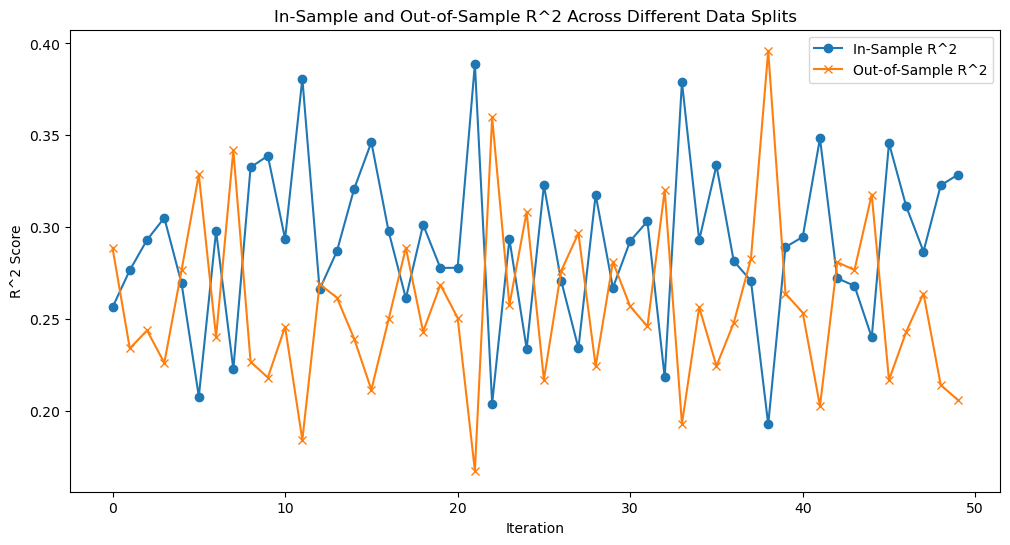

In [12]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Initialize lists to collect R-squared metrics
in_sample_r2_list = []
out_of_sample_r2_list = []

# Number of iterations
iterations = 50

# Loop to train and evaluate the model on different random splits
for _ in range(iterations):
    # Split the data randomly (without setting a seed)
    pokeaman_train, pokeaman_test = train_test_split(pokeaman, test_size=0.5)

    # Define and fit the model
    model_spec = smf.ols(formula='HP ~ Attack + Defense + Speed + Legendary + Q("Sp. Def") + Q("Sp. Atk")', 
                         data=pokeaman_train)
    model_fit = model_spec.fit()
    
    # Calculate in-sample R-squared
    in_sample_r2 = model_fit.rsquared
    in_sample_r2_list.append(in_sample_r2)
    
    # Predict on the test set and calculate out-of-sample R-squared
    yhat_test = model_fit.predict(pokeaman_test)
    y_test = pokeaman_test.HP
    out_of_sample_r2 = np.corrcoef(y_test, yhat_test)[0, 1] ** 2
    out_of_sample_r2_list.append(out_of_sample_r2)

# Convert results to a DataFrame for visualization
r2_df = pd.DataFrame({
    'In-Sample R^2': in_sample_r2_list,
    'Out-of-Sample R^2': out_of_sample_r2_list
})

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(r2_df['In-Sample R^2'], label="In-Sample R^2", marker='o')
plt.plot(r2_df['Out-of-Sample R^2'], label="Out-of-Sample R^2", marker='x')
plt.xlabel("Iteration")
plt.ylabel("R^2 Score")
plt.title("In-Sample and Out-of-Sample R^2 Across Different Data Splits")
plt.legend()
plt.show()


In [13]:
Q8: Purpose of Demonstration: This demonstration highlights the importance of generalizability and robustness in model evaluation. 
        By using different data splits, we can assess the model’s reliability on new data. 
        A model with consistent out-of-sample performance across splits is preferred for real-world applications, 
        as it is less likely to overfit and more likely to perform reliably on unseen data. 

SyntaxError: invalid character '’' (U+2019) (1277761153.py, line 2)

In [15]:
model7_gen1_predict_future = smf.ols(formula=model7_linear_form,
                                   data=pokeaman[pokeaman.Generation==1])
model7_gen1_predict_future_fit = model7_gen1_predict_future.fit()
print("'In sample' R-squared:    ", model7_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model7_gen1_predict_future_fit.rsquared, "(gen1_predict_future)")
y = pokeaman[pokeaman.Generation!=1].HP
yhat = model7_gen1_predict_future_fit.predict(pokeaman[pokeaman.Generation!=1])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1_predict_future)")
model7_gen1to5_predict_future = smf.ols(formula=model7_linear_form,
                                   data=pokeaman[pokeaman.Generation!=6])
model7_gen1to5_predict_future_fit = model7_gen1to5_predict_future.fit()
print("'In sample' R-squared:    ", model7_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model7_gen1to5_predict_future_fit.rsquared, "(gen1to5_predict_future)")
y = pokeaman[pokeaman.Generation==6].HP
yhat = model7_gen1to5_predict_future_fit.predict(pokeaman[pokeaman.Generation==6])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1to5_predict_future)")
model6_gen1_predict_future = smf.ols(formula=model6_linear_form,
                                   data=pokeaman[pokeaman.Generation==1])
model6_gen1_predict_future_fit = model6_gen1_predict_future.fit()
print("'In sample' R-squared:    ", model6_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model6_gen1_predict_future_fit.rsquared, "(gen1_predict_future)")
y = pokeaman[pokeaman.Generation!=1].HP
yhat = model6_gen1_predict_future_fit.predict(pokeaman[pokeaman.Generation!=1])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1_predict_future)")
model6_gen1to5_predict_future = smf.ols(formula=model6_linear_form,
                                   data=pokeaman[pokeaman.Generation!=6])
model6_gen1to5_predict_future_fit = model6_gen1to5_predict_future.fit()
print("'In sample' R-squared:    ", model6_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model6_gen1to5_predict_future_fit.rsquared, "(gen1to5_predict_future)")
y = pokeaman[pokeaman.Generation==6].HP
yhat = model6_gen1to5_predict_future_fit.predict(pokeaman[pokeaman.Generation==6])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1to5_predict_future)")

'In sample' R-squared:     0.37818209127432456 (original)
'Out of sample' R-squared: 2.2970146021462383e-05 (original)
'In sample' R-squared:     0.5726118179916575 (gen1_predict_future)
'Out of sample' R-squared: 0.11151363354803218 (gen1_predict_future)
'In sample' R-squared:     0.37818209127432456 (original)
'Out of sample' R-squared: 2.2970146021462383e-05 (original)
'In sample' R-squared:     0.3904756578094535 (gen1to5_predict_future)
'Out of sample' R-squared: 0.23394915464343125 (gen1to5_predict_future)
'In sample' R-squared:     0.3326310334310908 (original)
'Out of sample' R-squared: 0.00038866891913977205 (original)
'In sample' R-squared:     0.4433880517727282 (gen1_predict_future)
'Out of sample' R-squared: 0.1932858534276128 (gen1_predict_future)
'In sample' R-squared:     0.3326310334310908 (original)
'Out of sample' R-squared: 0.00038866891913977205 (original)
'In sample' R-squared:     0.33517279824114776 (gen1to5_predict_future)
'Out of sample' R-squared: 0.262626901

In [16]:
In essence, this illustration underscores the importance of balancing predictive power with model simplicity and interpretability.
Even if a complex model shows slightly better performance, it may still be at a disadvantage due to overfitting risks, weak statistical support for its coefficients, 
and interpretability issues. The sequential data split reinforces that complexity can obscure true generalizability, and simpler models like model6_fit often provide a more reliable, interpretable, and robust solution.

SyntaxError: invalid syntax (2067465430.py, line 1)

In [ ]:
chatbot history:https://chatgpt.com/c/673670c9-3bd4-8012-b1f7-b4406c17d323